Code Casa - Project 2 

HOUSING PRICE PREDICTION USING ML

I used Linear Regression to predict house prices based on some inputs

The dataset used is Boston Houses Dataset


Fares Yassen

# Importing essential libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Loading the data & taking a look on it

In [3]:
df = pd.read_csv(r"C:\Users\merof\Downloads\boston (1).csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
duplicates = df.duplicated()
print(df[duplicates])

Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV]
Index: []


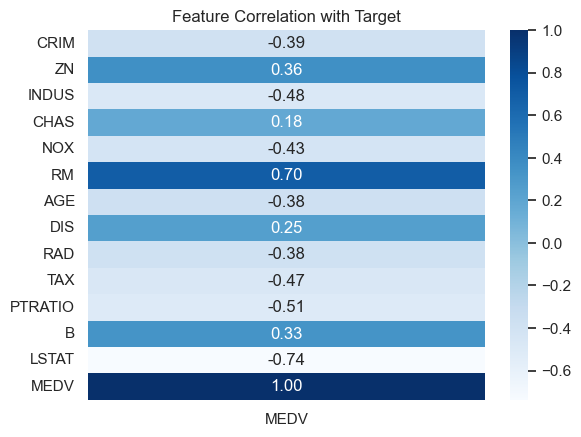

In [23]:
correlation_matrix = df.corr()

plt.figure()
sns.heatmap(correlation_matrix[['MEDV']], annot=True, cmap='Blues', fmt=".2f")
plt.title("Feature Correlation with Target")
plt.show()

#  Selecting the Inputs & Target

In [9]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [10]:
x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [11]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

#  Scaling and Splitting

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x)

x_scaled = scaler.transform(x)

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state=42)

# Modeling using Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [16]:
outputs = reg.predict(x_train)

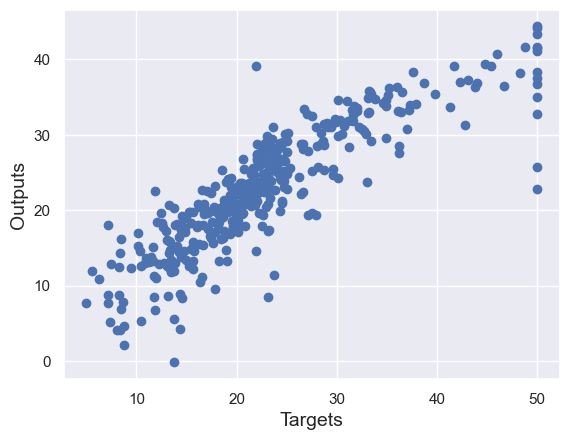

In [19]:
plt.scatter(y_train, outputs)

plt.xlabel('Targets', size=14)
plt.ylabel('Outputs', size=14)

plt.show()

In [24]:
reg.score(x_train, y_train)

0.7508856358979672

In [25]:
reg.intercept_

22.485268239316902

In [26]:
reg.coef_

array([-0.97149423,  0.70155562,  0.27675212,  0.70653152, -1.99143043,
        3.11571836, -0.17706021, -3.04577065,  2.28278471, -1.79260468,
       -1.97995351,  1.12649864, -3.62814937])

# Testing the model

In [27]:
outputs_test = reg.predict(x_test)

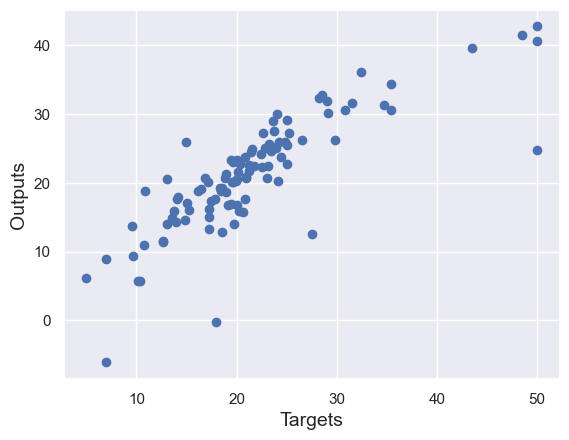

In [28]:
plt.scatter(y_test, outputs_test)

plt.xlabel('Targets', size=14)
plt.ylabel('Outputs', size=14)

plt.show()

# Final Scores 

## Mean Absolute Error (MAE)

In [31]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, outputs_test)
print(f"Mean Absolute Error: {mae.round(3)}")


Mean Absolute Error: 3.189


## R-Squared

In [33]:
from sklearn.metrics import r2_score
print("Train score : ",r2_score(y_train,outputs).round(4)*100,"%")
print("Test score : ",r2_score(y_test,outputs_test).round(4)*100,"%")

Train score :  75.09 %
Test score :  66.88 %
